## Introduction

This notebook attempts to explore the NYC taxi trip dataset from Kaggle (https://www.kaggle.com/c/nyc-taxi-trip-duration) as part of bigger project to select features for XGBoost.

## Feature conversion

In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv", parse_dates = ['pickup_datetime', 'dropoff_datetime'])

In [2]:
df_train.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [4]:
df_train['store_and_fwd_flag'] = df_train['store_and_fwd_flag'].apply(str)

In [5]:
df_train.loc[df_train['store_and_fwd_flag'] == 'Y']

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
348,id1633648,1,2016-06-20 14:19:16,2016-06-20 14:34:34,1,-73.977905,40.754871,-73.952774,40.768166,Y,918
491,id2042535,1,2016-02-12 12:36:38,2016-02-12 12:47:07,1,-73.978981,40.756519,-73.992165,40.749203,Y,629
610,id0909228,1,2016-05-08 15:02:28,2016-05-08 15:17:54,1,-73.988510,40.742935,-74.010620,40.723507,Y,926
774,id3697489,1,2016-01-13 13:53:29,2016-01-13 14:08:21,1,-73.948982,40.781578,-73.982346,40.778923,Y,892
846,id1026973,1,2016-06-25 21:53:30,2016-06-25 22:05:27,1,-73.982628,40.762341,-73.995537,40.749779,Y,717
...,...,...,...,...,...,...,...,...,...,...,...
1457556,id2229555,1,2016-01-22 19:05:50,2016-01-22 19:27:09,1,-73.874535,40.774082,-73.925362,40.732521,Y,1279
1457670,id0510811,1,2016-04-07 21:14:30,2016-04-07 21:51:38,1,-73.781944,40.644760,-73.976173,40.670235,Y,2228
1457897,id3209015,1,2016-03-20 18:49:55,2016-03-20 19:09:25,1,-73.990097,40.714352,-74.002579,40.750145,Y,1170
1458060,id1371896,1,2016-03-28 11:45:49,2016-03-28 12:21:45,1,-73.971008,40.759079,-74.010025,40.720810,Y,2156


In [6]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
for col in df_train.columns:
    print(f'unique values for {col}:', df_train[col].unique())

unique values for id: ['id2875421' 'id2377394' 'id3858529' ... 'id2304944' 'id2714485'
 'id1209952']
unique values for vendor_id: [2 1]
unique values for pickup_datetime: ['2016-03-14T17:24:55.000000000' '2016-06-12T00:43:35.000000000'
 '2016-01-19T11:35:24.000000000' ... '2016-01-10T07:35:15.000000000'
 '2016-04-22T06:57:41.000000000' '2016-01-05T15:56:26.000000000']
unique values for dropoff_datetime: ['2016-03-14T17:32:30.000000000' '2016-06-12T00:54:38.000000000'
 '2016-01-19T12:10:48.000000000' ... '2016-04-22T07:10:25.000000000'
 '2016-01-05T16:02:39.000000000' '2016-04-05T14:47:43.000000000']
unique values for passenger_count: [1 6 4 2 3 5 0 7 9 8]
unique values for pickup_longitude: [-73.98215485 -73.98041534 -73.97902679 ... -73.84746552 -73.89477539
 -73.84131622]
unique values for pickup_latitude: [40.76793671 40.73856354 40.7639389  ... 40.69665146 40.83586502
 40.82304382]
unique values for dropoff_longitude: [-73.96463013 -73.9994812  -74.00533295 ... -73.85946655 -74.042

Let's first convert the date_time values into separate columns of month, weekday, hour

In [9]:
df_train = df_train.assign(hour=df_train.pickup_datetime.dt.hour,
               weekday=df_train.pickup_datetime.dt.weekday,
               month=df_train.pickup_datetime.dt.month)

In [10]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,weekday,month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,0,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,5,3


Next we convert the distance between the polar coordinates between pick up and drop off points using the Harversine formula.
Let us first define a function for the calculation. You can alternatively use available packages as well.

In [11]:
from math import radians, cos, sin, asin, sqrt
#Note to self. If you don't use np here it will not be able to process the arguments from the dataframe

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [12]:
df_train = df_train.assign(dist = haversine(df_train.pickup_longitude, df_train.pickup_latitude, df_train.dropoff_longitude, df_train.dropoff_latitude))

In [13]:
df_train.head(20)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,weekday,month,dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,0,3,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,1,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2,4,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,5,3,1.187842
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,22,5,1,1.098252
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,22,4,6,1.325446
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,7,5,5,5.711393
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,23,4,5,1.309531
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,21,3,3,5.117946


I will also map non-numerical data in the store_and_fwd_flag column to dummy variables.

In [14]:
df_train.store_and_fwd_flag = df_train.store_and_fwd_flag.map({"Y":1, "N":0})

In [15]:
df_train.drop(['pickup_datetime','dropoff_datetime'], axis =1, inplace=True)

In [16]:
df_train.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,weekday,month,dist
0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,17,0,3,1.497580
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,6,6,1.804374
2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,11,1,1,6.381090
3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,19,2,4,1.484566
4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,13,5,3,1.187842


In [17]:
df_train = df_train[['id', 'vendor_id', 'passenger_count', 'store_and_fwd_flag', 'hour', 'weekday', 'month', 'dist', 'trip_duration' ,'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude' ]]

In [18]:
df_train.rename(columns = {'store_and_fwd_flag': 'flg'},inplace = True)

# Data Visualization

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Categorical Feature Analysis: Vendor ID


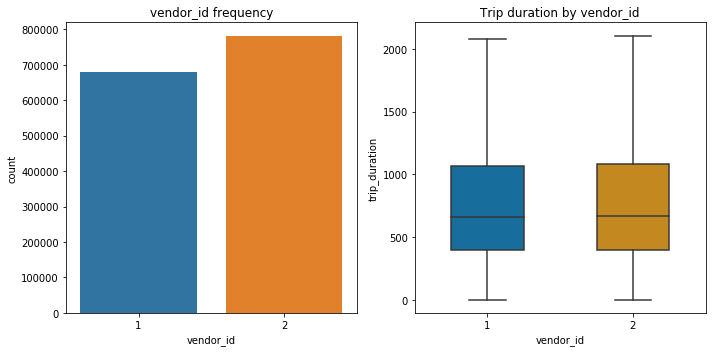

In [20]:
#Do not forget that if you set subplots to one row, it is basically a list.
f, axes = plt.subplots(1,2,figsize=(10, 5), sharex=False, sharey = False)
sns.countplot(x="vendor_id", data=df_train, ax=axes[0])
axes[0].title.set_text('vendor_id frequency')

sns.boxplot(y='trip_duration', x='vendor_id', 
                 data=df_train, 
                 width=0.5,
                 palette="colorblind",
                 showfliers=False,
                 ax=axes[1])
axes[1].title.set_text('Trip duration by vendor_id')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Trip duration by vendor_id')

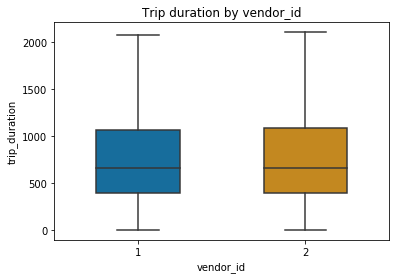

In [21]:
#we have some major outliers that make the boxes flat, so remove them
sns.boxplot(y='trip_duration', x='vendor_id', 
                 data=df_train, 
                 width=0.5,
                 palette="colorblind",
                 showfliers=False)
plt.title('Trip duration by vendor_id')

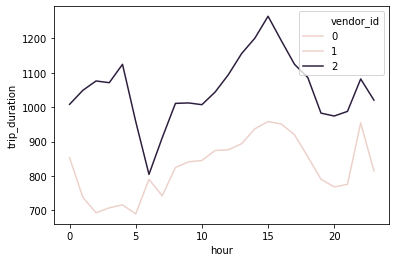

In [22]:
sns.lineplot(x="hour", y="trip_duration", hue="vendor_id", data=df_train, estimator = 'mean', ci = None)
#summary_hour_duration = pd.DataFrame(df_train.groupby(['weekday','hour'])['trip_duration'].mean())
#summary_hour_duration.reset_index(inplace = True)
#summary_hour_duration['unit']=1
#sns.set(style="white", palette="muted", color_codes=False)
#sns.set_context("poster")
#sns.tsplot(data=summary_hour_duration, time="hour", unit = "unit", condition="weekday", value="trip_duration")
#sns.despine(bottom = False)

We draw some conclusions about the data
- Overall the vendors don't seem to have major difference in trip frequencies and duration
- In a day, there seem to be some meaningful differences between in trip duration between vendor 1 and 2

Thus it seems vendor_id is a good feature.

## Categorical Feature Analysis: Store and Forward Flag

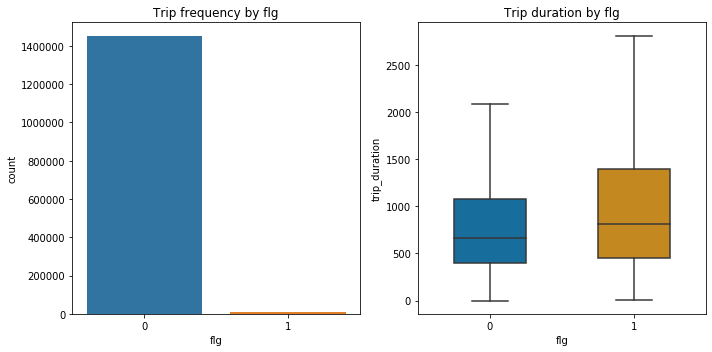

In [23]:
#sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1,2,figsize=(10, 5), sharex=False, sharey = False)
sns.countplot(x="flg", data=df_train, ax=axes[0])
axes[0].title.set_text('Trip frequency by flg')

sns.boxplot(y='trip_duration', x='flg', 
                 data=df_train, 
                 width=0.5,
                 palette="colorblind",
                 showfliers=False,
                 ax=axes[1])
axes[1].title.set_text('Trip duration by flg')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Trip duration during the day by flg')

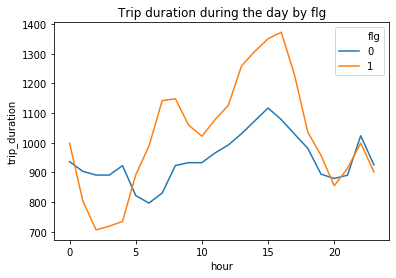

In [24]:
sns.lineplot(x="hour", y="trip_duration", hue="flg", data=df_train, estimator = 'mean', ci = None)
plt.title('Trip duration during the day by flg')

It seems that overall trip frequency is lower with vehicle records needing to stored during a trip. Overall the trip duration is higher when vehicle records have to be stored when vehicle records needing to be stored during a trip.

The main reason there is server disconnection with the vehicle seems to be that there is because longer distances outside server range are traveled, hence the longer trip duration and relative rarity of such trips compared to server connected trips.

We thus wouldn't be directly crediting trip duration increase to the variable ```flg```, and consider it redundant.

## Numerical Feature Analysis: Passenger Count

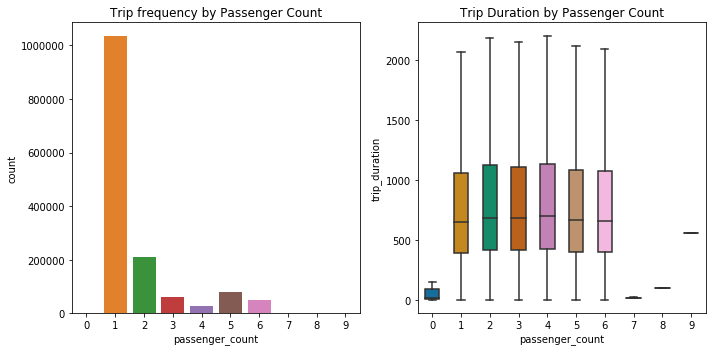

In [25]:
f, axes = plt.subplots(1,2,figsize=(10, 5), sharex=False, sharey = False)
sns.countplot(x="passenger_count", data=df_train, ax=axes[0])
axes[0].title.set_text('Trip frequency by Passenger Count')

sns.boxplot(y='trip_duration', x='passenger_count', 
                 data=df_train, 
                 width=0.5,
                 palette="colorblind",
                 showfliers=False,
                 ax=axes[1])
axes[1].title.set_text('Trip Duration by Passenger Count')
plt.tight_layout()
plt.show()

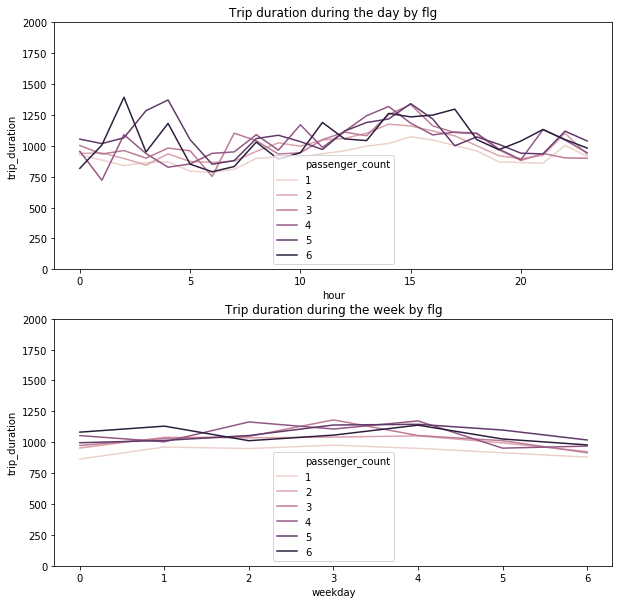

In [26]:
#lineplot assumes a numeric feature is some continuous quantity and chooses the representative value, avoid this
#using the legend argument
df_plot = df_train[(0 < df_train['passenger_count']) & (df_train['passenger_count'] < 7)]

f, axes = plt.subplots(2,1,figsize=(10, 10), sharex=False, sharey = False)
sns.lineplot(x="hour", y="trip_duration", hue="passenger_count", data=df_plot, estimator = 'mean', ci= None, legend="full", ax = axes[0])
axes[0].title.set_text('Trip duration during the day by flg')
axes[0].set_ylim([0, 2000])

sns.lineplot(x="weekday", y="trip_duration", hue="passenger_count", data=df_plot, estimator = 'mean', ci=None, legend="full", ax = axes[1])
axes[1].title.set_text('Trip duration during the week by flg')
axes[1].set_ylim([0, 2000])

plt.show()

- As expected there are almost no trips with 0 or 5 and over passengers. 
- Overall, there aren't major differences in trip duration in the common passenger count range.
- There doesn't seem to be meaningful differences in trip duration between passenger count and duration over the day or week other than the fact that trip duration increases a couple hundred seconds when passengers go over 2. (May consider adding a new feature by coupling with trip duration)




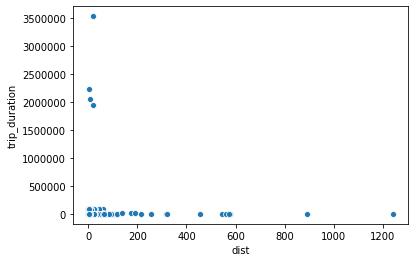

In [124]:
sns.scatterplot('dist', 'trip_duration', data = df_train)
plt.show()

In [129]:
df_train[['dist', 'trip_duration']].corr()

,dist,trip_duration
dist,1.000000,0.094777
trip_duration,0.094777,1.000000


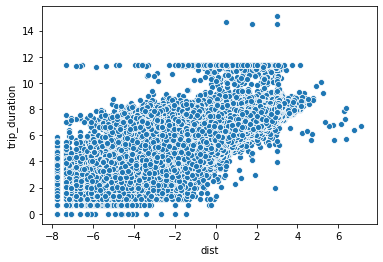

In [133]:
sns.scatterplot(np.log(df_train.dist), np.log(df_train.trip_duration), data = df_train)
plt.show()

## K-Means Clustering Pick up points

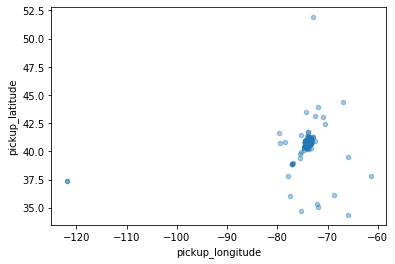

In [32]:
import folium 
df_train.plot(kind="scatter", x="pickup_longitude", y = "pickup_latitude", alpha=0.4)
plt.show()


In [39]:
#m = folium.Map(location=[40.730610, -73.935242], tiles="Stamen Toner", zoom_start=10)

#for i in range(0,len(df_train)):
#   folium.CircleMarker(
#      location=[df_train.iloc[i]['pickup_latitude'], df_train.iloc[i]['pickup_longitude']],
#      radius=10,
#      color='#3186cc',
#      fill=True,
#      fill_color='#3186cc'
#    ).add_to(m)
   
#m

KeyboardInterrupt: 

In [41]:
df_train.shape

(1458644, 13)

In [45]:
df_trainNY = df_train[(df_train['pickup_latitude'] > 40.4772) & (df_train['pickup_latitude'] < 45.0153) & (df_train['pickup_longitude'] > -79.7624) & (df_train['pickup_longitude'] < -71.7517)]

In [46]:
df_trainNY.shape

(1458601, 13)

In [61]:
#43 data points exist outside New York which we filter out for efficient K-means clustering
from sklearn.cluster import KMeans

df_pick = df_trainNY[['pickup_longitude', 'pickup_latitude']]
df_pick.head()

,pickup_longitude,pickup_latitude
0,-73.982155,40.767937
1,-73.980415,40.738564
2,-73.979027,40.763939
3,-74.010040,40.719971
4,-73.973053,40.793209


In [59]:
#Back up intial values to hasten K-means clustering
#
init = np.array([[ -73.98737616,   40.72981533],
       [-121.93328857,   37.38933945],
       [ -73.78423222,   40.64711269],
       [ -73.9546417 ,   40.77377538],
       [ -66.84140269,   36.64537175],
       [ -73.87040541,   40.77016484],
       [ -73.97316185,   40.75814346],
       [ -73.98861094,   40.7527791 ],
       [ -72.80966949,   51.88108444],
       [ -76.99779701,   38.47370625],
       [ -73.96975298,   40.69089596],
       [ -74.00816622,   40.71414939],
       [ -66.97216034,   44.37194443],
       [ -61.33552933,   37.85105133],
       [ -73.98001393,   40.7783577 ],
       [ -72.00626526,   43.20296402],
       [ -73.07618713,   35.03469086],
       [ -73.95759366,   40.80316361],
       [ -79.20167796,   41.04752096],
       [ -74.00106031,   40.73867723]])

In [70]:
k_means_pick = KMeans(n_clusters=20, init='random', n_init=20)
k_means_pick.fit(df_pick)
clust_pick = k_means_pick.labels_
df_trainNY['label_pick'] = clust_pick.tolist()
centroid_pickups = pd.DataFrame(k_means_pick.cluster_centers_, columns = ['centroid_pick_long', 'centroid_pick_lat'])

C:\Users\Jae-Hoon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [86]:
centroid_pickups

,centroid_pick_long,centroid_pick_lat
0,-73.993790,40.747669
1,-73.993519,40.722560
2,-74.003237,40.736140
3,-73.986365,40.734299
4,-73.967469,40.796882
5,-73.983952,40.682005
6,-73.952616,40.780359
7,-73.982375,40.766206
8,-73.959900,40.769293
9,-73.943154,40.816903


In [85]:
#centroid_pickups.plot(kind="scatter", x="centroid_pick_long", y = "centroid_pick_lat", alpha=0.4)
#plt.show()

m = folium.Map(location=[40.730610, -73.935242], tiles="OpenStreetMap", zoom_start=10)

for i in range(0,len(centroid_pickups)):
   folium.Circle(
      location=[centroid_pickups.iloc[i]['centroid_pick_lat'], centroid_pickups.iloc[i]['centroid_pick_long']],
      radius=10,
      popup=centroid_pickups.iloc[i]['centroid_pick_lat'],
      color= 'crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

m

In [74]:
centroid_pickups.to_csv("centroids.csv")
#from numpy import genfromtxt
#my_data = genfromtxt('my_file.csv', delimiter=',')